<a href="https://colab.research.google.com/github/ornob90/Mobile-Price-Prediction/blob/main/Mobile_Price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# from google.colab import files

# uploaded = files.upload()

In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly.express as px
import plotly.subplots as sp
from plotly.subplots import make_subplots
import plotly.figure_factory as ff


from scipy.stats import f_oneway
from scipy.stats import f
from scipy.stats import chi2
from scipy.stats import chi2_contingency
from scipy.stats import norm
from scipy.stats import ttest_ind

from typing import List

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
mobile = pd.read_csv('mobile_price_train.csv')
m_p_t = mobile.copy()

In [ ]:
m_p_t.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
m_p_t.isnull().mean() * 100

battery_power    0.0
blue             0.0
clock_speed      0.0
dual_sim         0.0
fc               0.0
four_g           0.0
int_memory       0.0
m_dep            0.0
mobile_wt        0.0
n_cores          0.0
pc               0.0
px_height        0.0
px_width         0.0
ram              0.0
sc_h             0.0
sc_w             0.0
talk_time        0.0
three_g          0.0
touch_screen     0.0
wifi             0.0
price_range      0.0
dtype: float64

In [ ]:
m_p_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [ ]:
fig = px.imshow(m_p_t.isnull(), color_continuous_scale='electric')

fig.update_layout(

    title = {
        'text' : "Distribution of Null Values",
        'x' : 0.5,
        'y' : 0.98
    },
    width = 900,
)
fig.show()

## **Handling Outliers**

### **Plotting the destribution to identify any outliers**

#### **Box Plot**

In [ ]:
num_colms = [col for col in m_p_t.columns if m_p_t[col].nunique() > 2]


fig = sp.make_subplots(rows=5, cols=3, vertical_spacing = 0.14, horizontal_spacing = 0.05)

idx = 0

for r in range(1, 6):
  for c in range(1, 4):

    col = num_colms[idx]
    idx+=1

    trace = go.Box(x=m_p_t[col], orientation='h', boxpoints='suspectedoutliers', boxmean=True)

    fig.add_trace(trace, row=r, col=c)
    fig.update_yaxes(showticklabels=False)
    fig.update_xaxes(title_text=col, row=r, col=c)

fig.update_layout(
    title={
        'text': 'Relationship between Relevant Features and Price Range',
        'y': 0.989,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font' : {
            'color' : '#393646',
            'family' : 'Bold',
            'size' : 26
        }

    },

    showlegend = False,
    height = 800,
    width = 1200
)

fig.show()





#### **Violin Plot**

In [ ]:
num_colms = [col for col in m_p_t.columns if m_p_t[col].nunique() > 2]


fig = sp.make_subplots(rows=5, cols=3, vertical_spacing = 0.14, horizontal_spacing = 0.05)

idx = 0

for r in range(1, 6):
  for c in range(1, 4):

    col = num_colms[idx]
    idx+=1

    trace = go.Violin(x=m_p_t[col], meanline_visible=True, orientation='h', points='suspectedoutliers', box_visible=True)

    fig.add_trace(trace, row=r, col=c)

    fig.update_yaxes(showticklabels=False)
    fig.update_xaxes(title_text=col, row=r, col=c)

fig.update_layout(
    title={
        'text': 'Relationship between Relevant Features and Price Range',
        'y': 0.989,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font' : {
            'color' : '#393646',
            'family' : 'Bold',
            'size' : 26
        }

    },

    showlegend = False,
    height = 1000,
    width = 1200
)

fig.show()





#### **From the graph we can see only two columns has outliers. [fc, px_height] And they both are rightly sqewed. So we have to use IQR method to handle the outliers in these two columns**


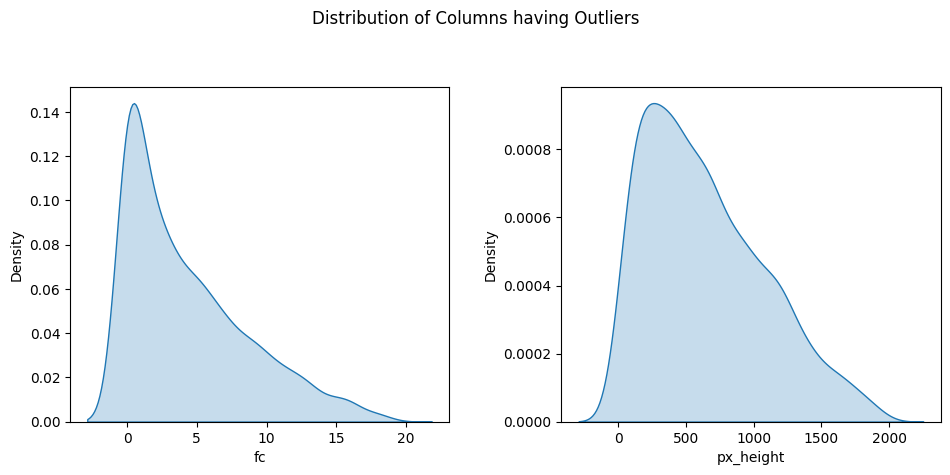

In [ ]:
fig, axes = plt.subplots(1, 2, figsize = (10, 5))
fig.suptitle("Distribution of Columns having Outliers")

sns.kdeplot(data=m_p_t['fc'],ax = axes[0], label="FC", fill=True)


sns.kdeplot(data=m_p_t['px_height'],ax = axes[1], label="PX Height", fill=True)



plt.tight_layout(pad = 2.5)

plt.show()

### **Using Trimming Method**

In [ ]:
print(f"FC \n {m_p_t['fc'].describe()} \n\n PX Height \n{m_p_t['px_height'].describe()}")

FC 
 count    2000.000000
mean        4.309500
std         4.341444
min         0.000000
25%         1.000000
50%         3.000000
75%         7.000000
max        19.000000
Name: fc, dtype: float64 

 PX Height 
count    2000.000000
mean      645.108000
std       443.780811
min         0.000000
25%       282.750000
50%       564.000000
75%       947.250000
max      1960.000000
Name: px_height, dtype: float64


In [ ]:
def iqr_lim(col):

  perct_25 = col.quantile(0.25)
  perct_75 = col.quantile(0.75)

  IQR = perct_75 - perct_25

  upper_limit = perct_75 + (1.5 * IQR)
  lower_limit = perct_25 - (1.5 * IQR)

  return upper_limit, lower_limit

upper_fc, lower_fc               = iqr_lim(m_p_t['fc'])
upper_px_height, lower_px_height = iqr_lim(m_p_t['px_height'])

print(f"FC Upper Limit        : {upper_fc}")
print(f"FC Lower Limit        : {lower_fc}")
print(f"PX Height Upper Limit : {upper_px_height}")
print(f"PX Height Lower Limit : {lower_px_height}")


FC Upper Limit        : 16.0
FC Lower Limit        : -8.0
PX Height Upper Limit : 1944.0
PX Height Lower Limit : -714.0


#### **Showing the outliers rows**

In [ ]:
m_p_t[m_p_t.fc > upper_fc]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
95,1137,1,1.0,0,18,0,7,1.0,196,3,19,942,1179,3616,13,5,12,1,1,1,3
169,1569,0,2.8,1,17,0,44,0.3,110,4,20,45,1942,1260,9,2,17,1,0,0,1
226,1708,1,2.4,1,18,1,49,0.1,109,1,19,233,517,3388,6,4,16,1,1,1,3
229,1689,0,1.8,0,17,0,24,0.3,127,3,18,954,1200,2766,7,2,7,0,1,1,3
300,1937,1,1.7,0,17,0,58,0.6,189,1,19,1728,1767,3321,5,4,14,1,1,0,3
305,1348,0,2.0,0,18,0,52,0.3,98,3,20,1869,1942,955,18,11,7,1,1,1,1
372,1703,1,1.5,1,17,1,55,0.7,138,5,19,1411,1711,2993,5,1,20,1,1,1,3
584,946,1,2.6,1,17,0,5,0.1,166,3,20,1698,1771,3720,15,7,4,0,1,0,3
1387,1533,1,1.1,1,18,1,17,0.3,160,4,20,1054,1393,2520,8,2,11,1,0,1,2
1406,1731,1,2.3,1,18,0,60,0.5,171,4,20,142,1039,1220,9,3,20,0,1,0,1


In [ ]:
m_p_t[m_p_t.fc < lower_fc]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range


In [ ]:
m_p_t[m_p_t['px_height'] > upper_px_height]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
988,1413,1,0.5,1,4,1,45,0.4,104,5,6,1949,1994,2973,17,8,15,1,0,1,3
1771,1230,1,1.6,0,0,1,48,0.7,111,7,2,1960,1963,1622,18,17,16,1,1,1,2


In [ ]:
m_p_t[m_p_t['px_height'] < lower_px_height]


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range


##### **Trimming FC**

In [ ]:
def trim_columns_plot(col, trim_col, name, method = "Trim"):

  plt.figure(figsize = (10, 5))

  plt.subplot(2, 2, 1)
  sns.kdeplot(data=col, label=name.upper(), fill=True)
  plt.xlabel(name.upper())

  plt.subplot(2, 2, 2)
  sns.boxplot(col,  orient = 'h')
  plt.xlabel(name.upper())


  plt.subplot(2, 2, 3)
  sns.kdeplot(data=trim_col, label=name.upper(), fill=True)
  plt.xlabel(f'{method} {name.upper()}')

  plt.subplot(2, 2, 4)
  ax = sns.boxplot(trim_col, orient = 'h')
  plt.xlabel(f'{method} {name.upper()}')

  plt.tight_layout(pad = 2.5)
  plt.show()


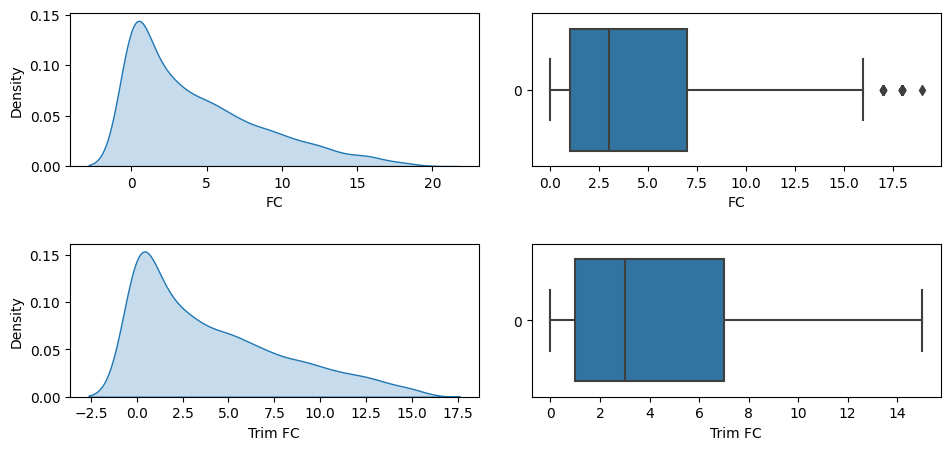

In [ ]:
trim_m_p_t_fc = m_p_t[m_p_t['fc'] < upper_fc]

trim_columns_plot(m_p_t.fc, trim_m_p_t_fc.fc, 'fc')

##### **Trimming PX Height**

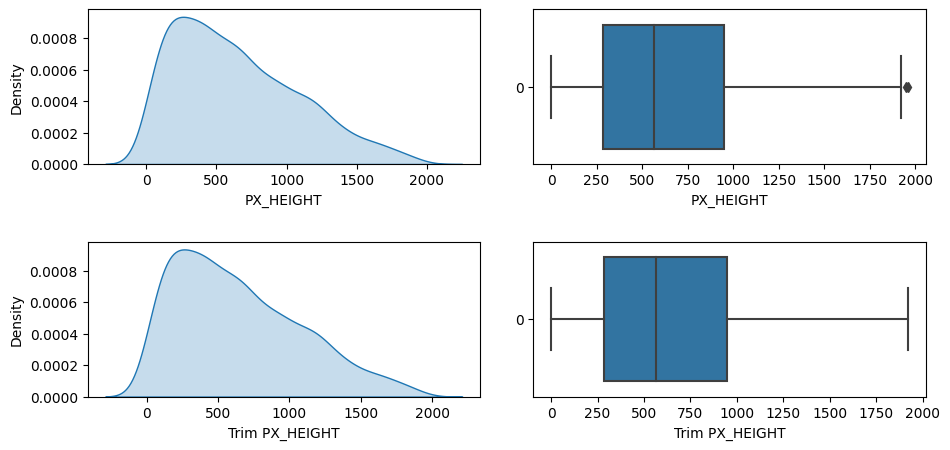

In [ ]:
trim_m_p_t_px_height = m_p_t[m_p_t['px_height'] < upper_px_height]
trim_columns_plot(m_p_t['px_height'], trim_m_p_t_px_height['px_height'], 'px_height')

### **Using Capping Method**

In [ ]:
capp_m_p_t_fc = m_p_t.copy()

capp_m_p_t_fc['fc'] = np.where(
    capp_m_p_t_fc['fc'] > upper_fc,
    upper_fc,
    np.where(
        capp_m_p_t_fc['fc'] < lower_fc,
        lower_fc,
        capp_m_p_t_fc['fc']
    )
)

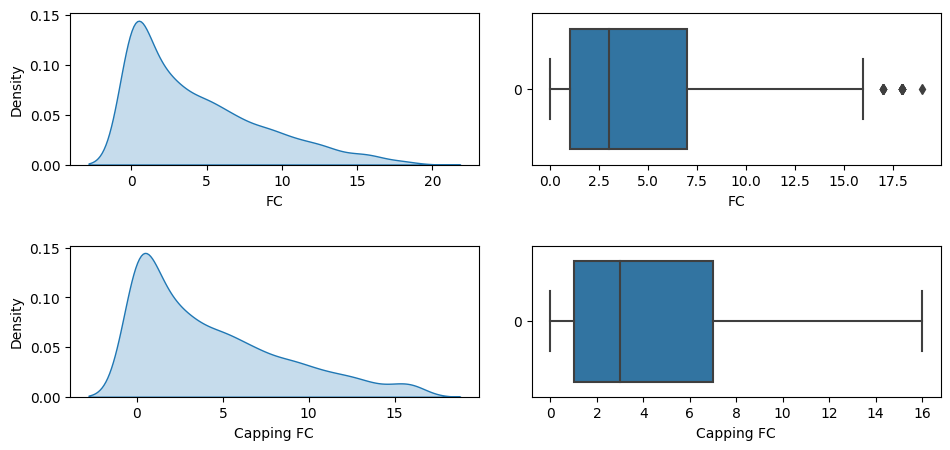

In [ ]:
trim_columns_plot(m_p_t['fc'], capp_m_p_t_fc['fc'], 'fc', method = "Capping")

#### **Based on the above analysis conducted, it can be concluded that the capping method is useful for the FC column, as this feature contains a greater number of outliers. Conversely, trimming may be more appropriate for the Px_height feature, as it only contains two outliers.**

In [ ]:
# Capping the FC columns

m_p_t['fc'] = np.where(
    m_p_t['fc'] > upper_fc,
    upper_fc,
    np.where(
        m_p_t['fc'] < lower_fc,
        lower_fc,
        m_p_t['fc']
    )
)

# Trimming the Px_height column

m_p_t_no_outlr = m_p_t[m_p_t['px_height'] < upper_px_height]


In [ ]:
fig = sp.make_subplots(rows=1, cols=2, vertical_spacing = 0.14, horizontal_spacing = 0.05)


trace1 = go.Box(x=m_p_t_no_outlr['fc'], orientation='h', boxpoints='suspectedoutliers', boxmean=True)

trace2 = go.Box(x=m_p_t_no_outlr['px_height'], orientation='h', boxpoints='suspectedoutliers', boxmean=True)


fig.add_trace(trace1, row=1, col=1)
fig.update_xaxes(title_text="FC", row=1, col=1)


fig.add_trace(trace2, row=1, col=2)
fig.update_xaxes(title_text="PX Height", row=1, col=2)


fig.update_yaxes(showticklabels=False)

fig.update_layout(

  title={
    'text': 'After Outliers Removal',
    'y': 0.96,
    'x': 0.5,
    'xanchor': 'center',
    'yanchor': 'top',
    'font' : {
        'color' : '#393646',
        'family' : 'Bold',
        'size' : 26
  }

},

showlegend = False,
height = 500,
width = 800
)

fig.show()





In [ ]:
catg_colms = [col for col in m_p_t.columns if col not in num_colms]
catg_colms



['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']

In [ ]:
m_p_t_no_outlr.head(5)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1.0,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0.0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2.0,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0.0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13.0,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
def target_category_hist(df, title = "Relationship between Categorical Features and Price Range", break_point = 13, rows = 2, cols = 3):

  fig = make_subplots(rows=rows, cols=cols, subplot_titles=catg_colms)

  idx = 0

  range_1 = df[df['price_range'] == 0]
  range_2 = df[df['price_range'] == 1]
  range_3 = df[df['price_range'] == 2]
  range_4 = df[df['price_range'] == 3]



  for r in range(1, rows + 1):
    for c in range(1, cols + 1):

      col = catg_colms[idx]
      idx += 1

      fig.add_trace(
          go.Histogram(x=df[col], y=range_1['price_range']),
          row=r, col=c

      )
      fig.add_trace(
          go.Histogram(x=df[col], y=range_2['price_range']),
          row=r, col=c

      )
      fig.add_trace(
        go.Histogram(x=df[col], y=range_3['price_range']),
        row=r, col=c

      )
      fig.add_trace(
        go.Histogram(x=df[col], y=range_4['price_range']),
        row=r, col=c

      )

      sorted_values = sorted(df[col].unique())
      fig.update_xaxes(type='category',categoryorder='array', categoryarray=sorted_values, row=r, col=c)
      fig.update_yaxes(title = "Price Range", row=r, col=c)



      if idx == 13:
        break


  fig.update_layout(
      showlegend=False,
      height=800,
      width=1600,
      title_text=title,
      title_x = 0.5,
      title_y = 0.98,
      title_font_size = 22,

  )


  fig.show()


target_category_hist(m_p_t_no_outlr)

## **Statistical Test to Select Features**

#### **Doing Anova Test to numeric columns to determine the significance of predicting price_rang**

#### **Creating our own ANOVA Function**

In [ ]:
def anova_one(*categories) -> List[float]:

  # Flatten all the categories into one 1D array
  # grand = np.array(categories)
  # grand = grand.flatten()
  grand = []

  for outer in categories:
    for elm in outer:
      grand.append(elm)

  num_of_condition = len(categories)
  total_num_of_data = len(grand)

  # for catg in categories:
  #   total_num_of_data += len(catg)

  df_bw = num_of_condition - 1
  df_wtn = total_num_of_data - num_of_condition

  # Critical Value
  f_crit = f.ppf(q=1-.05, dfn=df_bw, dfd=df_wtn)

  grand_mean = np.mean(grand)
  mean_arr = [np.mean(x) for x in categories]

  SST_numerator = grand

  # Sum of Squares Total Σ(x - x̄)^2
  SST = np.sum(np.apply_along_axis(lambda x: np.power(x - grand_mean, 2), 0, SST_numerator))

  # Sum of Squares Withing Σ(x1 - x̄1)^2 + Σ(x2 - x̄2)^2 + ... ... ... + Σ(xn - x̄n)^2
  SSW = 0
  temp = categories

  for catg in temp:

    catg_mean = np.mean(catg)

    SSW += np.sum(np.apply_along_axis(lambda x: np.power(x - catg_mean, 2), 0, catg))

  SSW = SSW

  # Sum of Squares Between
  SSBW = SST - SSW

  # Mean Squares Between
  MSBW =SSBW / df_bw

  # Mean Squares Within
  MSW = SSW / df_wtn

  f_stat = MSBW / MSW


  p_value = f.sf(f_stat, df_bw, df_wtn)

  return f_crit, f_stat, p_value






#### **Testing the Accuracy of my function with states.f_oneway**

In [ ]:
stdz_m_p_t = m_p_t_no_outlr.copy()
feature = 'battery_power'
col_0 = stdz_m_p_t[m_p_t["price_range"] == 0][feature]
col_1 = stdz_m_p_t[m_p_t["price_range"] == 1][feature]
col_2 = stdz_m_p_t[m_p_t["price_range"] == 2][feature]
col_3 = stdz_m_p_t[m_p_t["price_range"] == 3][feature]

# # print(len(col_0), len(col_1), len(col_2), len(col_3))
# # g = np.array([col_), col_1[0], col_2, col_3])
# # g = g.flatten()
# # g

# x = col_0
# y = col_1

# c = np.array([ x, y, col_2, col_3])
# z = []
# for outer in c:
#   for x in outer:
#     z.append(x)


# z = np.array(z)
# z.shape


<ipython-input-129-b78d6f0066bc>:3: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-129-b78d6f0066bc>:4: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-129-b78d6f0066bc>:5: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-129-b78d6f0066bc>:6: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [ ]:
f_oneway(col_0, col_1, col_2, col_3)

F_onewayResult(statistic=31.513495036295836, pvalue=6.713993985856411e-20)

In [ ]:
anova_one(col_0, col_1, col_2, col_3)

(2.6093652175723445, 31.513495036295783, 6.713993985856411e-20)

#### **Implementing Anova test with both our and built in functions and comparing it**

In [ ]:
# Extracting the numerical columns
n = len(num_colms)

HC_anova = []
anova = []

for col in num_colms[ :n - 1]:

  col_0 = stdz_m_p_t[m_p_t["price_range"] == 0][col]
  col_1 = stdz_m_p_t[m_p_t["price_range"] == 1][col]
  col_2 = stdz_m_p_t[m_p_t["price_range"] == 2][col]
  col_3 = stdz_m_p_t[m_p_t["price_range"] == 3][col]

  f_stat, p_value = f_oneway(col_0, col_1, col_2, col_3)

  anova.append([col, f_stat, p_value])

  _, f_stat, p_value = anova_one(col_0, col_1, col_2, col_3)

  HC_anova.append([col, f_stat, p_value])




<ipython-input-132-e2782bf37073>:9: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-132-e2782bf37073>:10: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-132-e2782bf37073>:11: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-132-e2782bf37073>:12: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



#### **Comparing my anova function to original anova**




In [ ]:
for i in range(len(anova)):
  print(anova[i][0])
  print(f"stat = {anova[i][1]}, p_value = {anova[i][2]}")
  print(f"my_stat = {HC_anova[i][1]}, my_p_value = {HC_anova[i][2]}")
  print()

battery_power
stat = 31.513495036295836, p_value = 6.713993985856411e-20
my_stat = 31.513495036295783, my_p_value = 6.713993985856411e-20

clock_speed
stat = 0.491978773388441, p_value = 0.6878760540629911
my_stat = 0.49197877338861495, my_p_value = 0.6878760540628887

fc
stat = 0.8412347075208211, p_value = 0.47119535676382607
my_stat = 0.8412347075208505, my_p_value = 0.47119535676382607

int_memory
stat = 2.9131423673657735, p_value = 0.03321699701567197
my_stat = 2.913142367365822, my_p_value = 0.033216997015667736

m_dep
stat = 1.5181696567539429, p_value = 0.20783366859699934
my_stat = 1.5181696567539407, my_p_value = 0.20783366859699934

mobile_wt
stat = 3.57796808786005, p_value = 0.013415544766487946
my_stat = 3.5779680878599414, my_p_value = 0.013415544766489661

n_cores
stat = 2.576356312579159, p_value = 0.052259228034057296
my_stat = 2.5763563125790894, my_p_value = 0.05225922803406589

pc
stat = 0.8581096270002767, p_value = 0.4621872664942891
my_stat = 0.8581096270003586

### **Doing Chi Square Test to categorical columns to determine the significance of predicting price_range**

#### **Creating our Own Chi Square Function**

In [ ]:
def cross_tab(ind, dep):

  # Fetching the rows and columns for the table

  new_df = pd.DataFrame({
      'ind' : ind,
      'dep' : dep
  })


  rows = ind.unique()
  cols = dep.unique()
  cols.sort()
  cols

  table = []

  for row in rows:
    c = []
    for col in cols:
      slices = len(new_df[(new_df['ind'] == row) & (new_df['dep'] == col)])
      c.append(slices)

    table.append(c.copy())
    c = c.clear()

  table = pd.DataFrame(table, columns = cols, index = rows)

  return table



def to_expected(observe):

  cols = observe.columns
  rows = observe.index

  grand_ttl = np.sum(np.sum(observe))

  expected = observe.copy()

  for row in rows:
    for col in cols:
      row_ttl = np.sum(observe.loc[row])
      col_ttl = np.sum(observe[col])

      expected.loc[row, col] = (row_ttl * col_ttl) / grand_ttl

  return expected

# print(to_expected(observe))


def chi_2_t(observed, expected):

  chi_square = np.sum(np.sum(np.power(observe - expected, 2) / expected))



  row_count = len(observed.index) - 1
  col_count = len(observed.columns) - 1

  df = row_count * col_count

  p_value = 1 - chi2.cdf(chi_square, df)

  return chi_square, p_value



### **Comparing my Chi2 function with built in functions**




#### Table Compare

In [ ]:
# My functions
HC_observe = cross_tab(stdz_m_p_t['dual_sim'], stdz_m_p_t['price_range'])
HC_expected = to_expected(HC_observe)

# Built in functions
observe = pd.crosstab(stdz_m_p_t['dual_sim'], stdz_m_p_t['price_range'])
expected = chi2_contingency(observe)[3]

expected = pd.DataFrame(expected, columns = observe.columns, index = observe.index)
print("Ovserve:\n ")
print(f"Hard Code:\n{HC_observe}")
print(f"\nBuilt IN:\n{observe}")

print(f"\nExpected: ")
print(f"\nHard Code:\n{HC_expected}")
print(f"\nBuilt IN:\n{expected}")


Ovserve:
 
Hard Code:
     0    1    2    3
0  250  245  250  235
1  250  255  249  264

Built IN:
price_range    0    1    2    3
dual_sim                       
0            250  245  250  235
1            250  255  249  264

Expected: 

Hard Code:
            0           1           2           3
0  245.245245  245.245245  244.754755  244.754755
1  254.754755  254.754755  254.245245  254.245245

Built IN:
price_range           0           1           2           3
dual_sim                                                   
0            245.245245  245.245245  244.754755  244.754755
1            254.754755  254.754755  254.245245  254.245245


#### **Chi Square value and p value compare**

In [ ]:
chi_square,p_values, _, _ = chi2_contingency(HC_observe)
HC_chi_square, HC_p_values = chi_2_t(HC_observe, HC_expected)


print(f"Built in chi_2  = {chi_square},   Built in p value  = {p_values}")
print(f"Hard Code chi 2 = {HC_chi_square},   Hard Code p value = {HC_p_values}")


Built in chi_2  = 1.1650734607420992,   Built in p value  = 0.7613927398347171
Hard Code chi 2 = 1.1650734607420992,   Hard Code p value = 0.7613927398347171


#### **Implementing Chi square test with both our and built in functions and comparing it**




In [ ]:
# Fetching the categorical columns
catg_colms = [col for col in stdz_m_p_t.columns if stdz_m_p_t[col].nunique() == 2]
n = len(catg_colms)

HC_chi_2 = []
chi_2 = []

for col in catg_colms:

  observe = cross_tab(stdz_m_p_t[col], stdz_m_p_t['price_range'])
  expected = to_expected(observe)

  chi_square,p_value, _, _ = chi2_contingency(observe)
  HC_chi_square, HC_p_values = chi_2_t(observe, expected)

  chi_2.append([col, chi_square, p_value])
  HC_chi_2.append([col, HC_chi_square, HC_p_values])

for i in range(len(chi_2)):
  print(HC_chi_2[i][0])
  print(f"stat    = {chi_2[i][1]},  p_value    = {chi_2[i][2]}")
  print(f"my_stat = {HC_chi_2[i][1]}, my_p_value = {HC_chi_2[i][2]}")
  print()






blue
stat    = 1.379985190664331,  p_value    = 0.7102329471672442
my_stat = 1.379985190664331, my_p_value = 0.7102329471672442

dual_sim
stat    = 1.1650734607420992,  p_value    = 0.7613927398347171
my_stat = 1.1650734607420992, my_p_value = 0.7613927398347171

four_g
stat    = 3.1839157849182875,  p_value    = 0.3641289090432397
my_stat = 3.183915784918287, my_p_value = 0.3641289090432396

three_g
stat    = 1.3194817939999668,  p_value    = 0.7245122123530843
my_stat = 1.3194817939999668, my_p_value = 0.7245122123530843

touch_screen
stat    = 3.9919597018810995,  p_value    = 0.26233364677575377
my_stat = 3.991959701881099, my_p_value = 0.262333646775754

wifi
stat    = 0.8039541146769342,  p_value    = 0.8485210293812833
my_stat = 0.8039541146769342, my_p_value = 0.8485210293812833



In [ ]:
m_p_t.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1.0,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0.0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2.0,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0.0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13.0,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


## **Feature Selection Based on P Value**








In [ ]:
p_values_num = {anova[i][0] : anova[i][2] for i in range(len(anova))}
p_values_catg = {HC_chi_2[i][0] : HC_chi_2[i][2] for i in range(len(HC_chi_2))}

p_values  = dict(p_values_num)
p_values.update(p_values_catg)

sort_p_values = sorted(p_values.items(), key = lambda x: x[1])
sort_p_values

# footballers_goals = {'Eusebio': 120, 'Cruyff': 104, 'Pele': 150, 'Ronaldo': 132, 'Messi': 125}

# sorted_footballers_by_goals = sorted(footballers_goals.items(), key=lambda x:x[1])
# print(sorted_footballers_by_goals)

[('ram', 0.0),
 ('battery_power', 6.713993985856411e-20),
 ('px_width', 2.881567837380335e-14),
 ('px_height', 2.6162526915481838e-12),
 ('mobile_wt', 0.013415544766487946),
 ('int_memory', 0.03321699701567197),
 ('n_cores', 0.052259228034057296),
 ('sc_h', 0.0828023294418198),
 ('sc_w', 0.17076307782254166),
 ('talk_time', 0.18144519465488843),
 ('m_dep', 0.20783366859699934),
 ('touch_screen', 0.262333646775754),
 ('four_g', 0.3641289090432396),
 ('pc', 0.4621872664942891),
 ('fc', 0.47119535676382607),
 ('clock_speed', 0.6878760540629911),
 ('blue', 0.7102329471672442),
 ('three_g', 0.7245122123530843),
 ('dual_sim', 0.7613927398347171),
 ('wifi', 0.8485210293812833)]

#### We Have to select the top features with the smallest p-values for training the model

#### Ram and battery_power have the smallest p-values, indicating a strong relationship with the target variable

#### Px_width and px_height also have small p-values and are statistically significant, but to a slightly lesser extent

#### Other features have larger p-values and may not have a strong relationship with the target variable

#### As a result we select ram, battery_power, px_width, px_height, mobile_wt, int_memory , n_cores and sc_h  as our top features for training the model

### **Features to work with**

In [ ]:
feature_to_work_with = [f[0] for f in sort_p_values[:4]]

feature_to_work_with

['ram', 'battery_power', 'px_width', 'px_height']

#### **Creating Box Plot to find any outliers (comparing with price_range)**


In [ ]:
relevent_colms = ['ram' , 'battery_power' , 'px_width' ,'px_height' , 'mobile_wt' , 'int_memory' , 'n_cores', 'sc_h']


In [ ]:
def box_plot(m_p_t, relevent_colms, title='Relationship between Numerical Features and Price Range') -> None:
  fig = sp.make_subplots(rows=2, cols=4, vertical_spacing = 0.14, horizontal_spacing = 0.05)

  idx = 0

  for r in range(1, 3):
    for c in range(1, 5):

      col = relevent_colms[idx]
      idx+=1


      trace1 = go.Box(x=m_p_t[m_p_t.price_range == 0][col], name='0', notched=True, orientation='h', boxpoints='suspectedoutliers')
      trace2 = go.Box(x=m_p_t[m_p_t.price_range == 1][col], name='1', notched=True, orientation='h', boxpoints='suspectedoutliers')
      trace3 = go.Box(x=m_p_t[m_p_t.price_range == 2][col], name='2', notched=True, orientation='h', boxpoints='suspectedoutliers')
      trace4 = go.Box(x=m_p_t[m_p_t.price_range == 3][col], name='3', notched=True, orientation='h', boxpoints='suspectedoutliers')

      fig.add_trace(trace1, row=r, col=c)
      fig.add_trace(trace2, row=r, col=c)
      fig.add_trace(trace3, row=r, col=c)
      fig.add_trace(trace4, row=r, col=c)

      fig.update_yaxes(title_text='Price Range', row=r, col=c)
      fig.update_xaxes(title_text=col, row=r, col=c)

  fig.update_layout(
      title={
          'text': title,
          'y': 0.989,
          'x': 0.5,
          'xanchor': 'center',
          'yanchor': 'top',
          'font' : {
              'color' : '#393646',
              'family' : 'Bold',
              'size' : 26
          }

      },
      margin=dict(l=50, r=50, t=50, b=50),
      showlegend = False,
      height = 800,
      width = 1200
  )

  fig.show()

box_plot(stdz_m_p_t, relevent_colms)


### **Handling the Outliers in ['ram', 'px_height'] Using Capping Method**

In [ ]:
categories = [0, 1, 2, 3]

for col in ['ram', 'px_height']:
    for cat in categories:

        # Subset of the data for the current category and column
        subset = stdz_m_p_t[stdz_m_p_t['price_range'] == cat][col]

        q1 = subset.quantile(0.25)
        q3 = subset.quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - (1.5 * iqr)
        upper_bound = q3 + (1.5 * iqr)

        # Using Capping Method
        subset[subset < lower_bound] = lower_bound
        subset[subset > upper_bound] = upper_bound

        stdz_m_p_t.loc[m_p_t_no_outlr['price_range'] == cat, col] = subset


In [ ]:
box_plot(stdz_m_p_t, relevent_colms, title = 'Relationship between Numerical Features and Price Range after handing outliers')

# **Creating a model to predict the price_range based on ram, battery_power, px_width, px_height using Decision Tree**

## **Coding my model from scratch**

#### **Node Class**

In [ ]:
class Node():

  def __init__(self, f_idx = None, threshold = None, left = None, right = None, IG = None,  value = None,):

    # Decision Node
    self.f_idx = f_idx
    self.threshold = threshold
    self.IG = IG
    self.left = left
    self.right = right


    # Leaf Node
    self.value = value


#### **Decision Tree Class**

In [ ]:
class Decision_tree():

  def __init__(self, min_sample_split = 2, max_depth = 2):

    self.root = None

    self.min_sample_split = min_sample_split
    self.max_depth = max_depth


  def make_tree(self, df, cur_depth = 0):

    X, Y = df[:, : -1], df[:, -1]

    n_samp, n_feature = np.shape(X)

    if n_samp >= self.min_sample_split and cur_depth <= self.max_depth:

      best_split = self.get_require_split(df, n_samp, n_feature)

      if best_split['IG'] > 0:

        left = self.make_tree(best_split['left_df'], cur_depth + 1)
        right = self.make_tree(best_split['right_df'], cur_depth + 1)

        return Node(best_split['f_idx'], best_split['threshold'], left, right, best_split['IG'])

    leaf_node = self.get_leaf_val(Y)

    return Node(value = leaf_node)

  def get_require_split(self, df, n_samp, n_feature):

    best_split = {}

    max_IG = -float("inf")

    for f_idx in range(n_feature):

      f_values = df[:, f_idx]
      n_threshholds = np.unique(f_values)

      for threshold in n_threshholds:

        left_df = np.array([r for r in df if r[f_idx] <= threshold])
        right_df = np.array([r for r in df if r[f_idx] > threshold])

        if len(left_df) > 0 and len(right_df) > 0:

          parent_y, l_child_y, r_child_y = df[:, -1], left_df[:, -1], right_df[:, -1]
          #
          cur_IG = self.information_gain(parent_y, l_child_y, r_child_y)

          if cur_IG > max_IG:

            max_IG = cur_IG

            best_split['f_idx'] = f_idx
            best_split['threshold'] = threshold
            best_split['left_df'] = left_df
            best_split['right_df'] = right_df
            best_split['IG'] = cur_IG

    return best_split

  def information_gain(self, parent, l_child, r_child):

    l_weight = len(l_child) / len(parent)
    r_weight = len(r_child) / len(parent)

    G_parent = self.gini_index(parent)
    G_l_child = self.gini_index(l_child)
    G_r_child = self.gini_index(r_child)

    IG = G_parent - (l_weight * G_l_child + r_weight * G_r_child)

    return IG

  def gini_index(self, target):

    categories = np.unique(target)

    gini_index = 0

    for catg in categories:
      p = len(target[target == catg]) / len(target)
      gini_index += p**2

    return 1 - gini_index


  def get_leaf_val(self, Y):
    Y = list(Y)

    return max(Y, key = Y.count)

  def fit(self, X, Y):
    df = np.concatenate((X, Y), axis = 1)
    self.root = self.make_tree(df)

  def predict(self, X):
    pred = [self.get_pred(x, self.root) for x in X]
    return pred

  def get_pred(self, x, root):

    if root.value != None:
      return root.value

    f_val = x[root.f_idx]

    if f_val <= root.threshold:
      return self.get_pred(x, root.left)
    else:
      return self.get_pred(x, root.right)





In [ ]:
data = stdz_m_p_t[['ram', 'battery_power', 'px_width', 'px_height', 'price_range']]

X = data.iloc[:, :-1].values
Y = data.iloc[:, -1].values.reshape(-1,1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2, random_state=41)


In [ ]:
model = Decision_tree(min_sample_split=2, max_depth=5)
model.fit(X_train,Y_train)

In [ ]:
Y_pred = model.predict(X_test)

In [ ]:
for x in range(len(Y_test[:100])):
  print(Y_test[x], end = ' ')
  if x % 10 == 0 and x != 0:
    print()



[1] [2] [2] [3] [2] [2] [1] [0] [1] [0] [2] 
[2] [3] [0] [1] [3] [1] [2] [2] [3] [0] 
[2] [0] [0] [3] [0] [0] [0] [0] [1] [3] 
[2] [0] [2] [1] [2] [0] [1] [0] [0] [1] 
[1] [0] [2] [3] [1] [3] [0] [1] [0] [2] 
[2] [2] [0] [3] [1] [3] [3] [3] [1] [3] 
[3] [2] [0] [2] [0] [3] [3] [3] [1] [0] 
[0] [2] [0] [2] [3] [1] [3] [1] [3] [3] 
[0] [2] [0] [0] [0] [3] [2] [0] [2] [2] 
[1] [0] [0] [1] [1] [3] [3] [0] [3] 

In [ ]:
for x in range(len(Y_pred[:100])):
  print(Y_test[x], end = ' ')
  if x % 10 == 0 and x != 0:
    print()

[1] [2] [2] [3] [2] [2] [1] [0] [1] [0] [2] 
[2] [3] [0] [1] [3] [1] [2] [2] [3] [0] 
[2] [0] [0] [3] [0] [0] [0] [0] [1] [3] 
[2] [0] [2] [1] [2] [0] [1] [0] [0] [1] 
[1] [0] [2] [3] [1] [3] [0] [1] [0] [2] 
[2] [2] [0] [3] [1] [3] [3] [3] [1] [3] 
[3] [2] [0] [2] [0] [3] [3] [3] [1] [0] 
[0] [2] [0] [2] [3] [1] [3] [1] [3] [3] 
[0] [2] [0] [0] [0] [3] [2] [0] [2] [2] 
[1] [0] [0] [1] [1] [3] [3] [0] [3] 

In [ ]:
X_test[:10, :]

array([[1026., 1331., 1226., 1109.],
       [2424., 1660.,  569.,  440.],
       [2547., 1187., 1125.,  215.],
       [3969.,  788., 1161.,   42.],
       [1955., 1872., 1259.,  459.],
       [2481., 1820., 1884.,  202.],
       [2330.,  912., 1053.,  329.],
       [ 558., 1273., 1399.,  485.],
       [1280., 1392., 1098.,  482.],
       [ 513.,  509., 1224., 1137.]])

### **Comparing the Accuracy of my model vs sklearn model**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
clf = DecisionTreeClassifier(max_depth=5, min_samples_split=2)
clf.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=5)

In [ ]:
y_pred2 = clf.predict(X_test)

#### **Sklearn**

In [ ]:
accuracy_score(Y_test, y_pred2)

0.8025

#### **Ours**

In [ ]:
accuracy_score(Y_test, Y_pred)

0.8225

# **Hypothesis Test**

In [ ]:
stdz_m_p_t.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1.0,0,7,0.6,188,2,2,20.0,756,2549.0,9,7,19,0,0,1,1
1,1021,1,0.5,1,0.0,1,53,0.7,136,3,6,905.0,1988,2631.0,17,3,7,1,1,0,2
2,563,1,0.5,1,2.0,1,41,0.9,145,5,6,1263.0,1716,2603.0,11,2,9,1,1,0,2
3,615,1,2.5,0,0.0,0,10,0.8,131,6,9,1216.0,1786,2769.0,16,8,11,1,0,0,2
4,1821,1,1.2,0,13.0,1,44,0.6,141,2,14,1208.0,1212,1411.0,8,2,15,1,1,0,1


## **Is the mean battery power of mobile phones with dual SIM slots significantly different from the mean battery power of mobile phones without dual SIM slots?**

In [ ]:
bp_dual_sim = stdz_m_p_t[stdz_m_p_t.dual_sim == 1]['battery_power']
bp_sing_sim = stdz_m_p_t[stdz_m_p_t.dual_sim == 0]['battery_power']

#### **Doing two t test**

In [ ]:
def two_samp_t_test(catg1, catg2, tail = 2):

  n1 = len(catg1)
  n2 = len(catg2)

  x1 = np.mean(catg1)
  x2 = np.mean(catg2)

  s1 = np.std(catg1)
  s2 = np.std(catg2)


  numerator = x1 - x2
  dnumarator = np.sqrt((np.power(s1, 2) / n1) + (np.power(s2, 2) / n2))

  z = numerator / dnumarator


  p_value = 1 - norm.cdf(abs(z))

  if tail == 2: p_value *= 2

  return z, p_value






### **Comparing my function to built in function**

In [ ]:
test_stat, p_val = two_samp_t_test(bp_dual_sim, bp_sing_sim)

print(f"Ttest_indResult(statistic={test_stat}, pvalue={p_val})")


Ttest_indResult(statistic=-1.8830319065537133, pvalue=0.05969604411395424)


In [ ]:
ttest_ind(a = bp_dual_sim, b = bp_sing_sim)

Ttest_indResult(statistic=-1.8814032154294624, pvalue=0.060062516535900105)

## **Is the mean weight of mobile phones with touch screens significantly different from the mean weight of mobile phones without touch screens?**


In [ ]:
wth_touch_scrn =  stdz_m_p_t[stdz_m_p_t.touch_screen == 1]['mobile_wt']
wthout_touch_scrn =  stdz_m_p_t[stdz_m_p_t.touch_screen == 0]['mobile_wt']

### **Comparing my function to built in function**

In [ ]:
test_stat, p_val =  two_samp_t_test(wth_touch_scrn, wthout_touch_scrn)

print(f"Ttest_indResult(statistic={test_stat}, pvalue={p_val})")


Ttest_indResult(statistic=-0.6476929143088618, pvalue=0.5171835880597975)


In [ ]:
ttest_ind(a = wth_touch_scrn, b = wthout_touch_scrn)

Ttest_indResult(statistic=-0.6472626009218954, pvalue=0.5175364329670469)

# **My functions**

In [ ]:
def mean(col):

  col = [v for v in col if v is not None]

  if not col:
      return None

  return np.sum(col) / len(col)


def median(col):

  col = [v for v in col if v is not None]

  if not col:
      return None

  sorted_values = sorted(col)

  n = len(sorted_values)

  middle = n // 2

  if n % 2 == 0:
      return (sorted_values[middle - 1] + sorted_values[middle]) // 2
  else:
      return sorted_values[middle]


def std_var(col, type = "std"):

  col = [v for v in col if v is not None]

  if not col:
      return None

  mean = np.sum(col) / len(col)

  squared_diffs = [(v - mean)**2 for v in col]

  variance = sum(squared_diffs) / len(squared_diffs)

  if type == "var":

    return variance

  return np.sqrt(variance)


In [ ]:
df = stdz_m_p_t.copy()

In [ ]:
print(f"Our Mean           : {mean(df['battery_power'])}")
print(f"Built in Mean      : {np.mean(df['battery_power'])}")
print()
print(f"Our Median         : {median(df['battery_power'])}")
print(f"Built in Median    : {np.median(df['battery_power'])}")
print()
print(f"Our Std            : {std_var(df['battery_power'])}")
print(f"Built in Std       : {np.std(df['battery_power'])}")
print()
variance = std_var(df['battery_power'], "var")
print(f"Our Variance       : {variance}")
print(f"Built in Variane   : {np.var(df['battery_power'])}")

Our Mean           : 1238.4354354354355
Built in Mean      : 1238.4354354354355

Our Median         : 1225
Built in Median    : 1225.0

Our Std            : 439.51077382231654
Built in Std       : 439.5107738223165

Our Variance       : 193169.72030589147
Built in Variane   : 193169.72030589145


# **Relevant Exploratory Data Analysis(previous):**

**0. Are there any correlations between the features in the dataset? If so, which features are most strongly correlated with each other?**

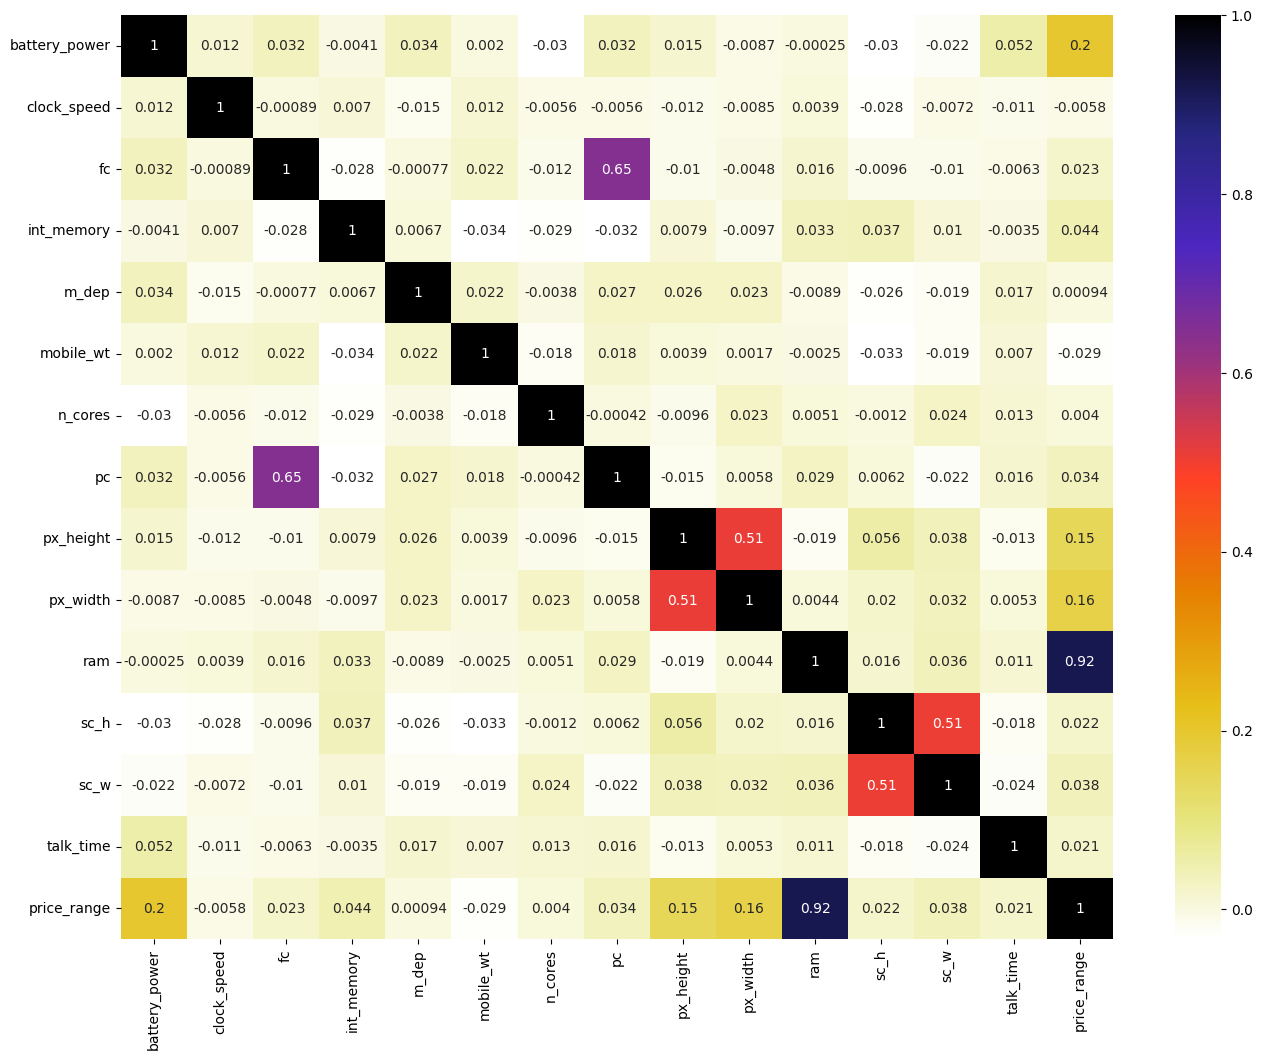

In [ ]:
# Calculate the correlation matrix
fig, axes = plt.subplots(1, 1, figsize=(16, 12))
corr_matrix = stdz_m_p_t[num_colms].corr()
sns.heatmap(corr_matrix, ax= axes, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()



There are some positive correlations among the features.
sc_h and sc_w has positive correlation of 0.51 value. It
means if the sc_h value is increased than the sc_w will be
increase too. Same thing goes for sc_w and sc_h. It means
sc_h is also depended on sc_w. px_height and px_width are
also have the correlation value of 0.51. It means they also
have positive correlation. If px_height increases than
px_width also increases and vice versa. PC and fc have the
correlation of 0.65 value. But the highest correlation is
between the features of ram and price_range. And there
value if 0.92. It means the price_range is highly
correlated on ram. It means if the ram configuration is
increased then it is highly chance that the price_range
will also be increased.

#### **1. How does the battery power vary across different price ranges?**

In [ ]:
fig = sp.make_subplots(rows=1, cols=1, vertical_spacing = 0.14, horizontal_spacing = 0.05)


trace1 = go.Box(x=df[df.price_range == 0][col], name='0', notched=True, orientation='h', boxpoints='suspectedoutliers')
trace2 = go.Box(x=df[df.price_range == 1][col], name='1', notched=True, orientation='h', boxpoints='suspectedoutliers')
trace3 = go.Box(x=df[df.price_range == 2][col], name='2', notched=True, orientation='h', boxpoints='suspectedoutliers')
trace4 = go.Box(x=df[df.price_range == 3][col], name='3', notched=True, orientation='h', boxpoints='suspectedoutliers')

fig.add_trace(trace1, row=1, col=1)
fig.add_trace(trace2, row=1, col=1)
fig.add_trace(trace3, row=1, col=1)
fig.add_trace(trace4, row=1, col=1)

fig.update_yaxes(title_text='Price Range', row=r, col=c)
fig.update_xaxes(title_text=col, row=r, col=c)

fig.update_layout(
  title={
      'text': 'Variation of battery power across different price-range',
      'y': 0.989,
      'x': 0.5,
      'xanchor': 'center',
      'yanchor': 'top',
      'font' : {
          'color' : '#393646',
          'family' : 'Bold',
          'size' : 22
      }

  },
  margin=dict(l=50, r=50, t=50, b=50),
  showlegend = False,
  height = 500,
  width = 700
)

fig.show()

# box_plot(stdz_m_p_t, relevent_colms)


#### **2. What is the relationship between pixel height (px_height) and pixel width (px_width)**

In [ ]:
px_height = df['px_height']
px_width = df['px_width']

fig = go.Figure()
fig.add_trace(go.Scatter(
    x=px_width,
    y=px_height,
    mode='markers',
    marker={
        'size':5,
        'color':'blue'
    }
))

corr = px_height.corr(px_width)

fig.update_layout(
    title = {
        'text' : f'Correlatoin between px_height and px_width: {corr:.2f}',
        'x' : 0.5,
        'y' : 0.96,
        'font' : {
            'family' : 'Bold',
            'size' : 22
        }
    },
    xaxis_title='Pixel Width',
    yaxis_title='Pixel Height'
)



fig.show()


From the above destribution we can say that there is a positive correlation between pixel height and pixel width. Though the relation is moderately strong. It's not highly linear.

#### **3.Distribution of price ranges across different categorical features**

In [ ]:
categorical_columns = ['dual_sim', 'touch_screen', 'wifi']
colors = ['#F15A59', '#393646', '#4287f5', '#FFA500']

fig = sp.make_subplots(rows=1, cols=3)

for i, column in enumerate(categorical_columns, 1):

    counts = df.groupby([column, 'price_range']).size().unstack()

    for j, category in enumerate(counts.columns):
        fig.add_trace(go.Bar(
            x=counts.index,
            y=counts[category],
            name=f'Price Range {category}',
            legendgroup=f'Price Range {category}',
            marker_color=colors[j],
            text=counts[category],
            showlegend=(i == 1)
        ), row=1, col=i)

    fig.update_xaxes(title_text=column, row=1, col=i)
    fig.update_yaxes(title_text='Count', row=1, col=i)

fig.update_layout(
    title = {
        'text' : 'Price Range Distribution by Categorical Features',
        'x' : 0.5,
        'y' : 0.96,
        'font' : {
            'family' : 'Bold',
            'size' : 22
        }
    }


)

fig.show()


From the above destribution we can conclude that majority of the phone in price range 3 have dual sim installed in them also there are not that much difference between the count of touch screen phone and button phone.

One thing also noticable is that there is more touch screen phones in price range 0 and 1 compare to price range 2 and 3. Also majority of the phone without touch screen are in price range 2.

Overall the numbers are almost similar in each category.

#### **4. What is the frequency of 4G connectivity for different price range categories**

In [ ]:
four_g = df['four_g']
price_range = df['price_range']

four_g_counts = df.groupby(['four_g', 'price_range']).size().unstack()

category_colors = ['#60424C' , '#984A59','#FF5959' , '#FF8F56']

fig = go.Figure()
for j, category in enumerate(four_g_counts.columns):
    fig.add_trace(go.Bar(
        x=four_g_counts.index,
        y=four_g_counts[category],
        name=f'Price Range {category}',
        marker_color=category_colors[j % len(category_colors)],
        text=four_g_counts[category],
        textposition='auto'
    ))

fig.update_yaxes(title_text='Count')

fig.update_layout(
    title = {
        'text' : 'Frequency of 4G Connectivity by Price Range',
        'x' : 0.5,
        'y' : 0.96,
        'font' : {
            'family' : 'Bold',
            'size' : 22
        }
    },
    xaxis={
        'tickvals': [0, 1],
        'ticktext': ['3G', '4G'],
    }
)

fig.show()


From the above destribution we can conclude that higher-priced mobile phones (Category 3) tend to have a higher frequency of 4G connectivity compared to other price range categories. On the other hand, lower-priced mobile phones (Category 2) have a higher frequency of 3G connectivity.

This information can be useful for understanding the relationship between price range and network connectivity options in the dataset. It suggests that as the price range increases, there is a higher likelihood of mobile phones having 4G connectivity

The highest frequency count of 274 in Price Range Category 3 suggests that mobile phones in this higher-priced category are more likely to offer 4G connectivity.

#### **5. How does the weight of the mobile device ('mobile_wt') differ across price ranges?**

In [ ]:

fig = px.histogram(
    df,
    x='mobile_wt',
    color='price_range',
    nbins=20,
    labels={'mobile_wt': 'Mobile Device Weight', 'count': 'Count', 'price_range': 'Price Range'},

)

fig.update_layout(
    bargap=0.1,
    title = {
        'text' : 'Distribution of Mobile Device Weight by Price Range',
        'x' : 0.5,
        'y' : 0.96,
        'font' : {
            'family' : 'Bold',
            'size' : 22
        }
    }

)

fig.show()


The distribution of phone weights across different price range categories suggests a potential negative correlation between price range and weight. The majority of mobile phones in the higher price range (Category 3) have relatively lower weights, typically falling within the 80-90 range. Conversely, the majority of mobile phones with weights ranging from 140 to 170 are found in the mid-price range (Category 2).

This observation indicates that as the price range increases, there is a tendency for mobile phones to have lighter weights. Similarly, within the mid-price range, there is a higher concentration of mobile phones with heavier weights.

#### **6. Distribution of the front camera megapixels ('fc') for different price range categories**

In [ ]:

price_range_categories = np.sort(df['price_range'].unique())
colors = ['#FF8400', '#FC2947', '#4287f5', '#000000']




fig = go.Figure()

for category, color in zip(price_range_categories, colors):
    data = df[df['price_range'] == category]['fc']
    fig.add_trace(go.Histogram(
        x=data,
        name=f'Price Range {category}',
        marker_color=color,
        opacity=0.7
    ))

fig.update_layout(
    title = {
        'text' : 'Distribution of Front Camera Megapixels by Price Range',
        'x' : 0.5,
        'y' : 0.96,
        'font' : {
            'family' : 'Bold',
            'size' : 22
        }
    },
    xaxis_title='Front Camera Megapixels',
    yaxis_title='Count',
    barmode='overlay',
    legend={
        'title':'Price Range',
        'x' : 0.85,
        'y' : 0.9
    }
)

fig.show()


The analysis indicates the following observations regarding front camera specifications and their relationship with price range categories:
Majority of phones lack a front camera.
Higher front camera pixel count is associated with a decrease in phone count.
The highest front camera resolution (16 megapixels) is mostly found in price range 1.
These findings highlight the limited prevalence of front cameras in the dataset, the inverse relationship between front camera pixel count and phone count, and the concentration of high-resolution front cameras in price range 1.

#### **7. Visualizing the relationship between the internal memory (int_memory) and the price range using a violin plot**

In [ ]:
fig = go.Figure()

colors_7 = ['#FFC600', '#F55353', '#9254C8', '#77D970']

for category in sorted(df['price_range'].unique()):
    data = df[df['price_range'] == category]['int_memory']
    fig.add_trace(go.Box(
        y=data,
        name=f"{category}",
        fillcolor=colors_7[category],
        line_color='black'
    ))

fig.update_layout(
    title={
        'text': 'Relationship between Internal Memory and Price Range',
        'x': 0.5,
        'y': 0.96,
        'font': {
            'family': 'Bold',
            'size': 22
        }
    },
    xaxis_title='Price Range',
    yaxis_title='Internal Memory',
    boxmode='group',
    legend={
        'title': 'Price Range',
        'x': 0.75,
        'y': 1
    },
    width=1000
)

fig.show()



The box plot analysis reveals that the distribution of internal memory is similar across different price range categories. There are no outliers, indicating a consistent pattern. The internal memory ranges from 2 to 64 megapixels in each category, providing a variety of options for consumers.

#### **8. Variation of clock speed across different price ranges**

In [ ]:
fig = px.box(df, x="price_range", y="clock_speed", color="price_range",
             labels={"price_range": "Price Range", "clock_speed": "Clock Speed"})

fig.update_layout(
    title = {
        'text' : 'Variation of Clock Speed across Price Ranges',
        'x' : 0.5,
        'y' : 0.96,
        'font' : {
            'family' : 'Bold',
            'size' : 22
        }
    },
    showlegend=False

)
fig.show()

The analysis of clock speed distribution across different price range categories indicates a consistent pattern. The distribution of clock speed appears to be similar across all price range categories, suggesting that there is no significant variation in clock speed based on the price range.

#### **9. Distribution of talk time for mobile devices**

In [ ]:
talk_time = df['talk_time']

fig = px.histogram(df, x='talk_time',color = 'price_range', nbins=30)

fig.update_layout(
    title = {
        'text' : 'Distribution of Talk Time for Mobile Devices across different price range',
        'x' : 0.5,
        'y' : 0.96,
        'font' : {
            'family' : 'Bold',
            'size' : 22
        }
    },
    xaxis_title='Talk Time',
    yaxis_title='Count'
)

fig.show()

Based on the distribution analysis, a notable observation is that the talk time for mobile phones in price range 0 is consistently greater compared to other price range categories, irrespective of the duration of talk time. This conclusion suggests that, within the given dataset, mobile phones falling within price range 0 tend to offer longer talk time capabilities compared to devices in other price range categories.

#### **10. Distribution of mobile device weights across different touch screen types(0, 1)**

In [ ]:
weights = df['mobile_wt']
touch_screen = df['touch_screen']

fig = px.box(df, x=touch_screen, y=weights, color=touch_screen)

fig.update_layout(
    title = {
        'text' : 'Distribution of Mobile Device Weights across Touch Screen Types',
        'x' : 0.5,
        'y' : 0.96,
        'font' : {
            'family' : 'Bold',
            'size' : 22
        }
    },
    xaxis_title  = 'Touch Screen',
    yaxis_title = 'Mobile Device Weight',
    showlegend=False
)

fig.show()

The analysis of Mobile Device Weights in relation to Touch Screen Types reveals that there is minimal difference observed between touch screen and non-touch screen devices. The distribution of mobile weights for both touch screen and non-touch screen devices exhibits similarities. Specifically, both touch screen and non-touch screen devices have a maximum weight of 200 and a minimum weight of 80. Additionally, the median weight for both types of devices is found to be the same.

#### **11. Correlation between battery power and clock speed using scatter plot**

In [ ]:
battery_power = df['battery_power']
clock_speed = df['clock_speed']

correlation = battery_power.corr(clock_speed)

fig = px.scatter(df, x=battery_power, y=clock_speed)

fig.update_layout(
    title = {
        'text' : f'Correlation between Battery Power and Clock Speed {correlation : .3f}',
        'x' : 0.5,
        'y' : 0.96,
        'font' : {
            'family' : 'Bold',
            'size' : 22
        }
    },
    xaxis_title='Battery Power',
    yaxis_title='Clock Speed'
)

fig.show()

The scatter plot analysis reveals a correlation coefficient of 0.012 between battery power and clock speed. This correlation coefficient indicates a very weak and nearly negligible positive correlation between the two variables.

The value of 0.012 suggests that there is almost no linear relationship between battery power and clock speed within the given dataset. It implies that changes in battery power do not consistently correspond to changes in clock speed, and vice versa. Therefore, based on this analysis, it can be concluded that battery power and clock speed have a very weak or insignificant linear relationship.

#### **12. Correlation between the amount of internal memory and the screen size (sc_h * sc_w) using scatter plot**

In [ ]:

df_12 = df.copy()

df_12['screen_size'] = df_12['sc_h'] * df_12['sc_w']

correlation = np.corrcoef(df_12['int_memory'], df_12['screen_size'])[0][1]

fig = px.scatter(df_12, x='int_memory', y='screen_size')

fig.update_layout(
    title={
        'text': f'Relationship between Internal Memory and Screen Size {correlation : .3f}',
        'x': 0.5,
        'y': 0.96,
        'font': {'size': 22, 'family': 'Bold'}
    },
    xaxis_title='Internal Memory (GB)',
    yaxis_title='Screen Size (pixels)'
)


fig.show()

#### The analysis of the relationship between the internal memory and screen size (sc_h * sc_w) of mobile devices showed a very weak correlation (r = 0.021). This means that there is almost no connection between the size of the screen and the amount of internal memory in mobile devices